In [5]:
# import libraries
from rdkit import Chem
from rdkit.Chem import Draw, rdDepictor, AllChem, Descriptors, PandasTools
# 環状化合物をきれいに描画 https://future-chem.com/rdkit-coordgen/
rdDepictor.SetPreferCoordGen(True)
import pandas as pd

SDFファイルを読み込み

,ID,ROMol,FASTA
0,,,WASTA
1,,,wasta

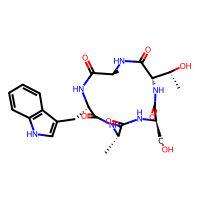
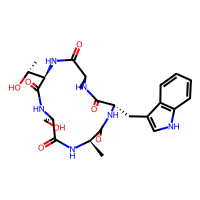

In [63]:
df = PandasTools.LoadSDF('../streamlit/WASTA_dl.sdf')
df['FASTA'] = ['WASTA', 'wasta']
df

Descriptorsのリストを作成、検索

In [31]:
DesList = pd.DataFrame(Descriptors.descList)
keyword = input('search')
print(keyword)
DesList[DesList[0].str.contains(keyword)]

rb


,0,1
108,NumAliphaticCarbocycles,<function <lambda> at 0x13f49bc70>
111,NumAromaticCarbocycles,<function <lambda> at 0x13f49b9a0>
118,NumSaturatedCarbocycles,<function <lambda> at 0x13f49bac0>
148,fr_alkyl_carbamate,<function _LoadPatterns.<locals>.<lambda> at 0...
157,fr_barbitur,<function _LoadPatterns.<locals>.<lambda> at 0...


MolファイルからDescriptorを生成

,ID,ROMol,FASTA,MW,MolLogP,TPSA,HBD,HBA,No.RB,rings
0,,,WASTA,516.555,-2.4391,201.75,8,7,4,3
1,,,wasta,516.555,-2.4391,201.75,8,7,4,3

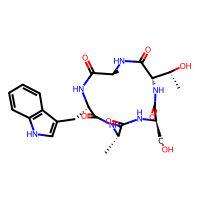
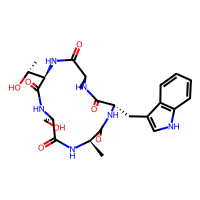

In [64]:
df['MW'] = df.ROMol.map(Descriptors.MolWt)
df['MolLogP'] = df.ROMol.map(Descriptors.MolLogP)
df['TPSA'] = df.ROMol.map(Descriptors.TPSA)
df['HBD'] = df.ROMol.map(Descriptors.NumHDonors)
df['HBA'] = df.ROMol.map(Descriptors.NumHAcceptors)
df['No.RB'] = df.ROMol.map(Descriptors.NumRotatableBonds)
df['rings'] = df.ROMol.map(AllChem.CalcNumRings)
df

smilesのリスト

In [58]:
smiles = [
    'CCCC',
    'C1=CC=CC=C1',
    'CC1=CNC2=C1C=CC=C2',
]

SMILESのリストからMOLファイルとDescriptorを生成

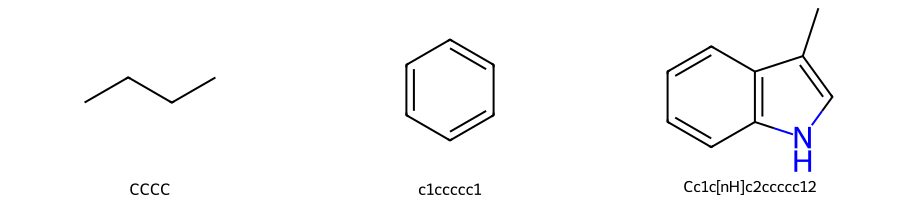

In [71]:
df = pd.DataFrame(columns=['SMILES'])
df['SMILES'] = smiles
df['ROMol'] = df.SMILES.map(lambda x: Chem.MolFromSmiles(x))
df['SMILES'] = df.ROMol.map(lambda x: Chem.MolToSmiles(x))
df['MW'] = df.ROMol.map(Descriptors.MolWt)
df['MolLogP'] = df.ROMol.map(Descriptors.MolLogP)
df['TPSA'] = df.ROMol.map(Descriptors.TPSA)
df['HBD'] = df.ROMol.map(Descriptors.NumHDonors)
df['HBA'] = df.ROMol.map(Descriptors.NumHAcceptors)
df['No.RB'] = df.ROMol.map(Descriptors.NumRotatableBonds)
df['rings'] = df.ROMol.map(AllChem.CalcNumRings)
df['Ar'] = df.ROMol.map(Descriptors.NumAromaticRings)
Draw.MolsToGridImage(df.ROMol,
                     molsPerRow=3,
                     subImgSize=(300,200),
                     legends= list(df.SMILES),
                     useSVG=True
                     )
# df.T